In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load all data and merge which from "processed" folder
def load_data_time():
    data = []
    for root, dirs, files in os.walk("processed_time_10s_charlton2024_baseline"):
        for file in files:
            # if file.startswith(""):
            # add subject id
            subject_id = file.split("_")[1]
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            df["subject_id"] = subject_id
            data.append(df)
    return pd.concat(data, ignore_index=True)

def load_data_freq():
    data = []
    for root, dirs, files in os.walk("processed_frequency"):
        for file in files:
            # if file.startswith(""):
            # add subject id
            subject_id = file.split("_")[1]
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            df["subject_id"] = subject_id
            data.append(df)
    return pd.concat(data, ignore_index=True)

# load data
data_time = load_data_time()
data_freq = load_data_freq()

In [3]:
# count the number of labels
labels = data_time['label'].unique()
# count the number of labels
label_counts = data_time['label'].value_counts()
label_counts

label
2    13629
0     3959
1      468
Name: count, dtype: int64

In [4]:
# # delete column that every row is none
def delete_none_column(df):
    for col in df.columns:
        if df[col].isnull().all():
            df.drop(col, axis=1, inplace=True)
    return df
# delete none column
data_time = delete_none_column(data_time)
data_freq = delete_none_column(data_freq)
df_time = data_time.copy()
df_freq = data_freq.copy()

In [5]:
print(df_time.columns)
print(df_freq.columns)

Index(['EDA_Mean', 'EDA_Min', 'EDA_Max', 'EDA_Std', 'EDA_Kurtosis', 'EDA_Skew',
       'EDA_Num_Peaks', 'EDA_Amphitude', 'EDA_Duration', 'HR_Mean', 'HR_Min',
       'HR_Max', 'HR_Std', 'HR_RMS', 'temp_Mean', 'temp_Min', 'temp_Max',
       'temp_Std', 'temp_rms', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD',
       'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN',
       'HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI',
       'HRV_TINN', 'window_start_sec', 'start_unix', 'end_unix', 'label',
       'subject_id'],
      dtype='object')
Index(['HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_TP', 'HRV_LFHF', 'HRV_LFn',
       'HRV_HFn', 'HRV_LnHF', 'window_start_sec', 'start_unix', 'end_unix',
       'label', 'subject_id'],
      dtype='object')


In [6]:
df_time["label_binary"] = df_time["label"].replace({2: 1, 1: 1, 0: 0})
df_freq["label_binary"] = df_freq["label"].replace({2: 1, 1: 1, 0: 0})
time_attributes = df_time.columns[:-6]
freq_attributes = df_freq.columns[:-6]

In [7]:
len(time_attributes)

38

In [8]:
# drop nan values in time data
df_time = df_time.dropna()

baseline_attributes = time_attributes[:19]
hrv_attributes = time_attributes[19:]
hrv_attributes

len(baseline_attributes)

19

In [9]:
baseline_attributes

Index(['EDA_Mean', 'EDA_Min', 'EDA_Max', 'EDA_Std', 'EDA_Kurtosis', 'EDA_Skew',
       'EDA_Num_Peaks', 'EDA_Amphitude', 'EDA_Duration', 'HR_Mean', 'HR_Min',
       'HR_Max', 'HR_Std', 'HR_RMS', 'temp_Mean', 'temp_Min', 'temp_Max',
       'temp_Std', 'temp_rms'],
      dtype='object')

In [10]:
eda_attributes = baseline_attributes[:9]
hr_attributes = baseline_attributes[9:14]
temp_attributes = baseline_attributes[14:19]

In [11]:
len(hrv_attributes)

19

<Axes: xlabel='label', ylabel='count'>

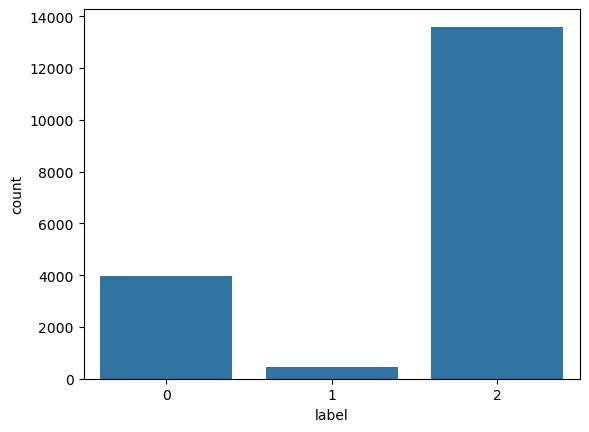

In [12]:
sns.countplot(data=df_time, x='label')

<Axes: xlabel='label_binary', ylabel='count'>

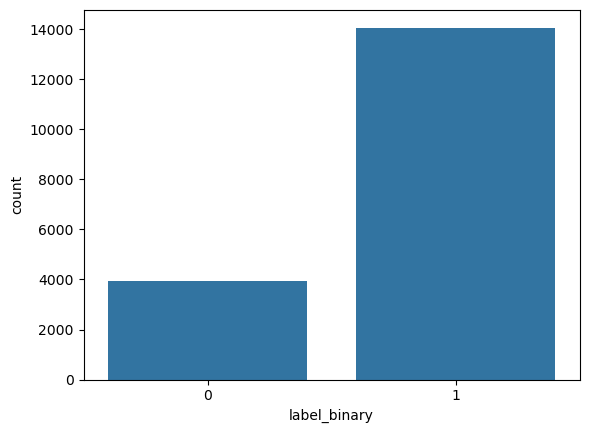

In [13]:
sns.countplot(data=df_time, x='label_binary')

label_binary
1    3959
0    3959
Name: count, dtype: int64


<Axes: xlabel='label_binary', ylabel='count'>

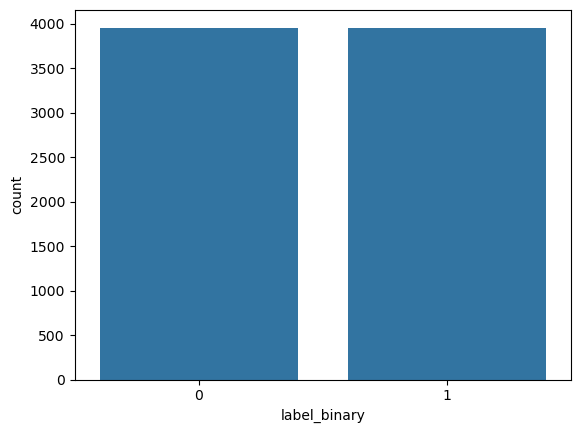

In [14]:
from sklearn.utils import resample

df_time_majority = df_time[df_time["label_binary"] == 1]
df_time_minority = df_time[df_time["label_binary"] == 0]

df_time_majority_downsampled = resample(
    df_time_majority,
    replace=False,
    n_samples=len(df_time_minority),
    random_state=42
)

df_time_balanced = pd.concat([df_time_majority_downsampled, df_time_minority])

print(df_time_balanced["label_binary"].value_counts())
sns.countplot(data=df_time_balanced, x='label_binary')


In [15]:
df_time.groupby('label_binary').describe().T.to_csv('label_statistics_time_10s_charlton_baseline.csv')
df_freq.groupby('label_binary').describe().T.to_csv('label_statistics_freq_unnamed.csv')

In [16]:
df_time

,EDA_Mean,EDA_Min,EDA_Max,EDA_Std,EDA_Kurtosis,EDA_Skew,EDA_Num_Peaks,EDA_Amphitude,EDA_Duration,HR_Mean,...,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,window_start_sec,start_unix,end_unix,label,subject_id,label_binary
0,0.272278,0.000000,0.731640,0.167394,0.818678,1.018537,1,0.721122,5.556597,64.683,...,531.250,1859.375,4.000000,109.375,0.0,1.595433e+09,1.595433e+09,2,15,1
1,0.281797,0.169136,0.474092,0.072729,-0.471368,0.471048,1,0.156323,11.851632,68.692,...,890.625,2437.500,5.000000,0.000,5.0,1.595433e+09,1.595433e+09,2,15,1
2,0.280900,0.155041,0.440778,0.094586,-1.569220,0.059627,2,0.421559,19.050185,70.173,...,937.500,2437.500,5.000000,0.000,10.0,1.595433e+09,1.595433e+09,2,15,1
3,0.190886,0.000000,0.440778,0.125583,-0.590170,0.412276,1,0.284456,7.426549,71.507,...,796.875,1796.875,5.000000,0.000,15.0,1.595433e+09,1.595433e+09,2,15,1
4,0.099431,0.000000,0.269080,0.067788,0.054036,0.573899,0,0.000000,0.000000,72.601,...,390.625,1500.000,5.500000,296.875,20.0,1.595433e+09,1.595433e+09,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18051,3.868984,3.680390,4.053033,0.092992,-0.325863,0.026729,1,0.250990,5.781962,78.531,...,421.875,1328.125,4.000000,0.000,210.0,1.595344e+09,1.595344e+09,2,F5,1
18052,3.852593,3.680390,4.078644,0.120199,-0.935008,0.716560,2,0.304774,14.448579,78.008,...,421.875,1328.125,4.666667,0.000,215.0,1.595344e+09,1.595344e+09,2,F5,1
18053,3.803708,3.531845,4.078644,0.130387,0.317718,-0.029277,1,0.203609,6.161871,77.251,...,468.750,1265.625,6.000000,281.250,220.0,1.595344e+09,1.595344e+09,2,F5,1
18054,3.624002,3.429400,3.881438,0.152036,-1.418013,0.573010,1,0.203609,6.161871,76.671,...,468.750,1265.625,11.000000,0.000,225.0,1.595344e+09,1.595344e+09,2,F5,1


Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN'],
      dtype='object')

## RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

x = df_time[time_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]
groups = df_time["subject_id"]

rf = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
rf.fit(train, train_labels)
predictions = rf.predict(test)
print(classification_report(test_labels, predictions))
acc_rf_bs_hrv = accuracy_score(test_labels, predictions)
print("Accuracy RF Baseline + HRV:", acc_rf_bs_hrv)

# show the feature importance
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': time_attributes, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
print(feature_importance)


# use only baseline features
baseline_features = [
        'EDA_Mean','EDA_Min','EDA_Max','EDA_Std', 'EDA_Kurtosis', 'EDA_Skew','EDA_Num_Peaks','EDA_Amphitude','EDA_Duration',
        'HR_Mean','HR_Min','HR_Max','HR_Std','HR_RMS','temp_Mean', 'temp_Min','temp_Max','temp_Std', 'temp_rms',
    ]

x = df_time[baseline_features]
y = df_time["label"]
x.dropna()
y = y[x.index]

rf = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
rf.fit(train, train_labels)
predictions = rf.predict(test)
print(classification_report(test_labels, predictions))
acc_rf_bs = accuracy_score(test_labels, predictions)
print("Accuracy RF baseline features:", acc_rf_bs)


x = df_time[hrv_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]

rf = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
rf.fit(train, train_labels)
predictions = rf.predict(test)
print(classification_report(test_labels, predictions))
accuracy_rf_hrv = accuracy_score(test_labels, predictions)
print("Accuracy RF HRV features:", accuracy_rf_hrv)

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1322
           1       0.92      0.45      0.61       157
           2       0.92      0.99      0.95      4469

    accuracy                           0.93      5948
   macro avg       0.93      0.74      0.80      5948
weighted avg       0.93      0.93      0.92      5948

Accuracy RF Baseline + HRV: 0.925857431069267
          feature  importance
0       temp_Mean    0.114536
1        temp_Max    0.105677
2        temp_Min    0.098814
3        EDA_Mean    0.087502
4         EDA_Max    0.086633
5         EDA_Min    0.074338
6         EDA_Std    0.048577
7          HR_Max    0.028321
8         HR_Mean    0.027718
9          HR_Min    0.027358
10       temp_Std    0.018361
11         HR_RMS    0.018100
12         HR_Std    0.016761
13   HRV_MedianNN    0.015865
14  EDA_Amphitude    0.015109
15    HRV_Prc80NN    0.014519
16    HRV_Prc20NN    0.013521
17       temp_rms    0.013452
18 

In [22]:
hrv_attributes

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN'],
      dtype='object')

## XGBOOST

In [23]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

x = df_time[time_attributes]
y = df_time["label"]
x.dropna(inplace=True)
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
acc_xgb_bs_hrv = accuracy_score(test_labels, predictions)
print("Accuracy XGBoost Baseline + HRV Features:", acc_xgb_bs_hrv)

# show the feature importance
importance = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'feature': time_attributes, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance.reset_index(drop=True, inplace=True)
print(feature_importance)

# use only baseline features
x = df_time[baseline_attributes]
y = df_time["label"]
x.dropna(inplace=True)
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
acc_xgb_bs = accuracy_score(test_labels, predictions)
print("Accuracy XGBoost Baseline Features:", acc_xgb_bs)

# use only HRV features
x = df_time[hrv_attributes]
y = df_time["label"]
x.dropna(inplace=True)
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
acc_xgb_hrv = accuracy_score(test_labels, predictions)
print("Accuracy XGBoost HRV Features:", acc_xgb_hrv)


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\2157558098.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1322
           1       0.88      0.73      0.80       157
           2       0.96      0.98      0.97      4469

    accuracy                           0.95      5948
   macro avg       0.93      0.86      0.89      5948
weighted avg       0.95      0.95      0.95      5948

Accuracy XGBoost Baseline + HRV Features: 0.9510759919300605
          feature  importance
0        temp_Max    0.089802
1        EDA_Mean    0.086648
2       temp_Mean    0.082151
3         EDA_Min    0.071936
4        temp_Min    0.065396
5         EDA_Max    0.059858
6          HR_Max    0.041779
7          HR_Min    0.039254
8         EDA_Std    0.034281
9          HR_RMS    0.031714
10       temp_Std    0.029690
11        HR_Mean    0.025518
12   HRV_MedianNN    0.022346
13    HRV_Prc80NN    0.020772
14         HR_Std    0.017639
15  EDA_Amphitude    0.017486
16      HRV_MaxNN    0.017099
17       temp_rms 

C:\Users\malik\AppData\Local\Temp\ipykernel_33776\2157558098.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1322
           1       0.89      0.75      0.81       157
           2       0.96      0.98      0.97      4469

    accuracy                           0.96      5948
   macro avg       0.93      0.87      0.90      5948
weighted avg       0.96      0.96      0.96      5948

Accuracy XGBoost Baseline Features: 0.9567921990585071


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\2157558098.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.45      0.09      0.15      1322
           1       0.18      0.01      0.02       157
           2       0.76      0.97      0.85      4469

    accuracy                           0.75      5948
   macro avg       0.47      0.36      0.34      5948
weighted avg       0.68      0.75      0.67      5948

Accuracy XGBoost HRV Features: 0.7473100201748487


In [24]:
top_features = feature_importance["feature"][0:10]
print("Top features:", top_features.tolist())

Top features: ['temp_Max', 'EDA_Mean', 'temp_Mean', 'EDA_Min', 'temp_Min', 'EDA_Max', 'HR_Max', 'HR_Min', 'EDA_Std', 'HR_RMS']


In [25]:
# use only top 10 features
x = df_time[top_features]
y = df_time["label"]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
acc_xgb_top_features = accuracy_score(test_labels, predictions)
print("Accuracy XGBoost Top Features:", acc_xgb_top_features)


c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:59:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1322
           1       0.91      0.79      0.85       157
           2       0.97      0.99      0.98      4469

    accuracy                           0.96      5948
   macro avg       0.94      0.89      0.92      5948
weighted avg       0.96      0.96      0.96      5948

Accuracy XGBoost Top Features: 0.9626765299260256


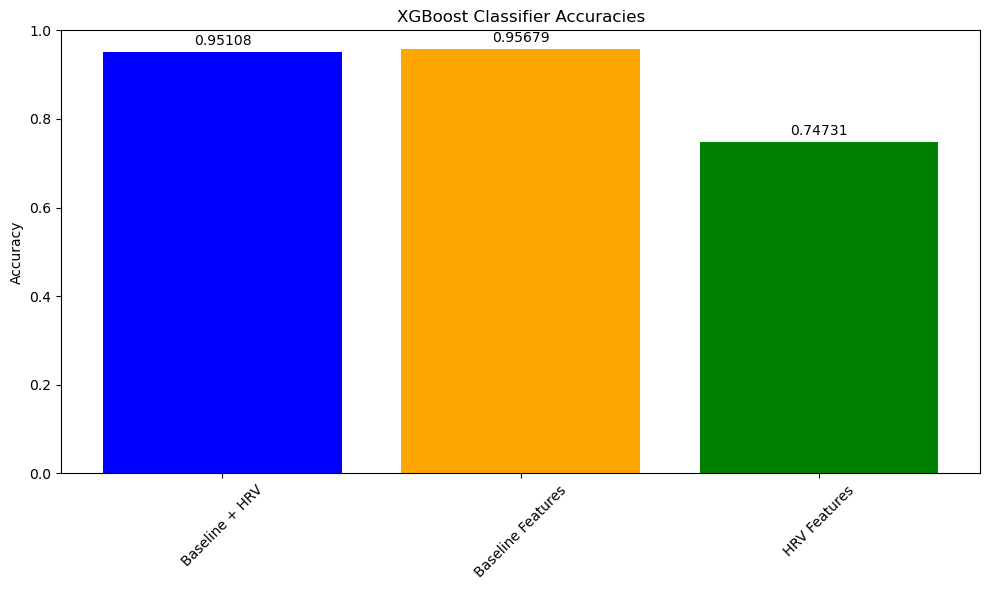

In [26]:
# plot a bar chart of the accuracies
accuracies = {
    'Baseline + HRV': acc_xgb_bs_hrv,
    'Baseline Features': acc_xgb_bs,
    'HRV Features': acc_xgb_hrv,
    # 'Top Features': acc_xgb_top_features,
}

# plot and add the exact accuracy values to the bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('XGBoost Classifier Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center', va='bottom')

C:\Users\malik\AppData\Local\Temp\ipykernel_33776\1825197926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


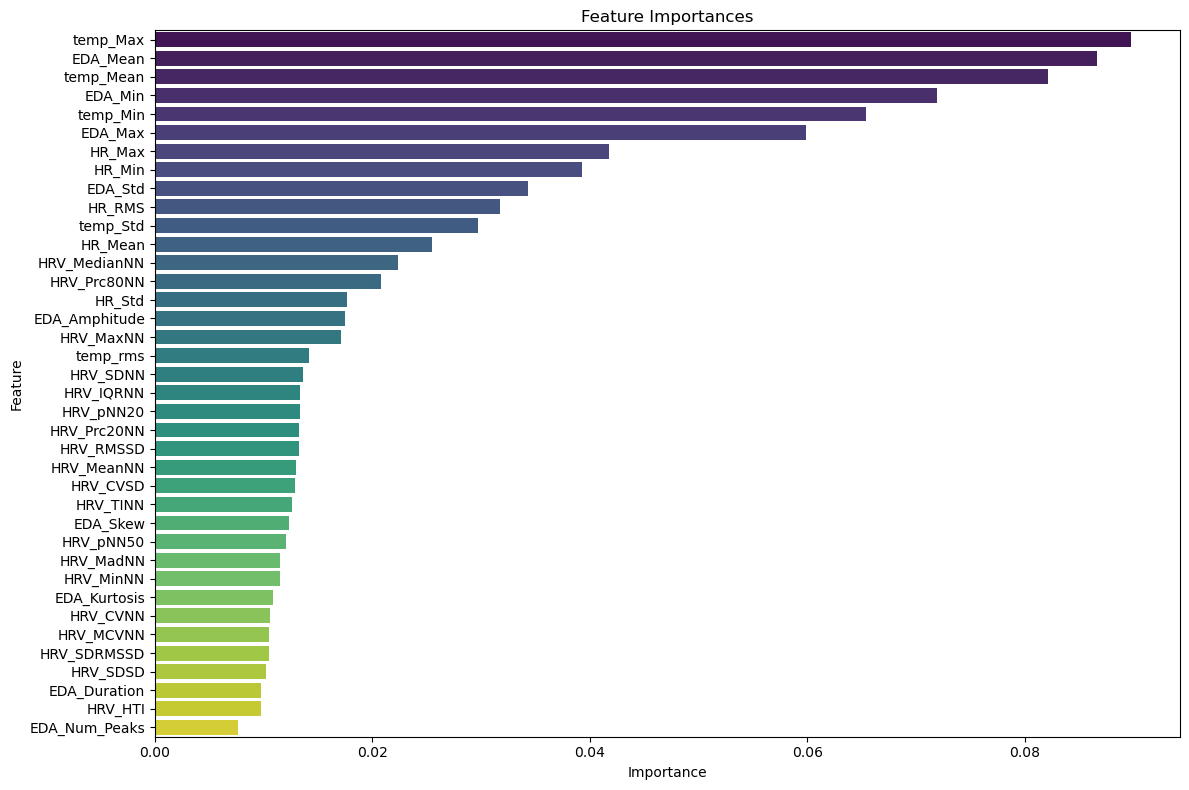

In [27]:
# plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_rf_baseline_hrv.png')
plt.show()

In [ ]:
# print feature importance with score

# FEATURE SELECTION

In [28]:
x = df_time[time_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]

## Univariate Feature Selection

In [29]:
from sklearn.calibration import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# Choose the right test based on your features:
# f_classif (ANOVA F-test) for continuous data vs categorical target
# mutual_info_classif (Mutual information) for continuous data

def get_selection_univariate(x, y):

    selector = SelectKBest(score_func=f_classif, k="all")  # k="all" will return scores for all features
    selector_mutual = SelectKBest(score_func=mutual_info_classif, k="all")  # k="all" will return scores for all features
    selector_chi2 = SelectKBest(score_func=chi2, k="all")  # k="all" will return scores for all features

    X_new = selector.fit_transform(x, y)
    X_new_mutual = selector_mutual.fit_transform(x, y)

    le = LabelEncoder()
    X_encoded = x.apply(le.fit_transform)

    X_new_chi2 = selector_chi2.fit_transform(X_encoded, y)

    # Get feature scores
    feature_scores = selector.scores_
    feature_scores_mutual = selector_mutual.scores_
    feature_scores_chi2 = selector_chi2.scores_

    # Create a DataFrame of feature names and their corresponding scores
    selected_features_ftest = pd.DataFrame({
        'Feature': x.columns,
        'Score': feature_scores
    }).sort_values(by='Score', ascending=False)

    selected_features_mutual = pd.DataFrame({
        'Feature': x.columns,
        'Score': feature_scores_mutual
    }).sort_values(by='Score', ascending=False)

    selected_features_chi2 = pd.DataFrame({
        'Feature': x.columns,
        'Score': feature_scores_chi2
    }).sort_values(by='Score', ascending=False)

    return selected_features_ftest, selected_features_mutual, selected_features_chi2

## Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import RFE

def get_selection_rfe(x, y):
    """
    Perform Recursive Feature Elimination (RFE) with XGBoost classifier.
    
    Parameters:
    x (DataFrame): Features.
    y (Series): Target variable.
    
    Returns:
    selected_features_rfe (Index): Selected features after RFE.
    """

    # # Initialize XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)

    # # RFE: Recursive feature elimination with cross-validation
    selector = RFE(xgb_model)  # Select top 10 features

    # Initialize RF model
    # rf_model = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
    # selector = RFE(rf_model)

    
    selector = selector.fit(x, y)

    # Get selected features
    selected_features_rfe = x.columns[selector.support_]

    selected_features_rfe = pd.DataFrame({
        'Feature': selected_features_rfe,
        'Rank': selector.ranking_[selector.support_]
    }).sort_values(by='Rank')
    
    return selected_features_rfe

## L1 Regularization (Lasso Regression)

In [32]:
# from sklearn.linear_model import Lasso
# # Initialize Lasso (L1 Regularization)

# def get_selection_l1(x, y):
#     """
#     Perform feature selection using L1 Regularization (Lasso).
    
#     Parameters:
#     x (DataFrame): Features.
#     y (Series): Target variable.
    
#     Returns:
#     selected_features_l1 (Index): Selected features after L1 Regularization.
#     """
    
#     # Initialize Lasso
#     lasso = Lasso(alpha=0.01)  # alpha controls the amount of regularization

#     # Fit the model
#     lasso.fit(x, y)

#     # Get the feature coefficients
#     coef = pd.Series(lasso.coef_, index=x.columns)

#     # Select features where the coefficient is non-zero
#     selected_features_l1 = coef[coef != 0].index

#     selected_features_l1 = pd.DataFrame({
#         'Feature': selected_features_l1,
#         'Coefficient': coef[selected_features_l1]
#     }).sort_values(by='Coefficient', ascending=False)
    
#     return selected_features_l1

## Tree-based Feature Importance

In [57]:
def get_selection_treebased(x, y):
    """
    Perform feature selection using tree-based methods (XGBoost).
    
    Parameters:
    x (DataFrame): Features.
    y (Series): Target variable.
    
    Returns:
    selected_features_treebased (DataFrame): DataFrame with features and their importance scores.
    """
    
    # Initialize XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)

    # Fit the model
    xgb_model.fit(x, y)

    # Get feature importance
    importances = xgb_model.feature_importances_

    # # Initialize RF model
    # rf_model = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
    # rf_model.fit(x, y)
    # importances = rf_model.feature_importances_
    
    # Create a DataFrame of features and their importance scores
    selected_features_treebased = pd.DataFrame({
        'Feature': x.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    return selected_features_treebased



## Boruta Algorithm

In [87]:
# from boruta import BorutaPy
# import xgboost as xgb

# def get_selection_boruta(x, y):
#     """
#     Perform feature selection using Boruta with XGBoost as the base estimator.
    
#     Parameters:
#     x (DataFrame): Features.
#     y (Series): Target variable.
    
#     Returns:
#     selected_features_boruta (Index): Selected features after Boruta.
#     """

#     # xgboost as base estimator
#     xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)

#     # Boruta feature selection
#     boruta = BorutaPy(xgb_model, n_estimators='auto', random_state=30)
#     boruta.fit(x.values, y.values)

#     # Get selected features
#     selected_features_boruta = x.columns[boruta.support_]

#     selected_features_boruta = pd.DataFrame({
#         'Feature': selected_features_boruta,
#         'Ranking': boruta.ranking_[boruta.support_]
#     }).sort_values(by='Ranking', ascending=True)

#     return selected_features_boruta


## Correlation Matrix

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_selection_corr(x, threshold=0.8):  
    # Compute correlation matrix
    corr_matrix = x.corr().abs()
    
    # Get upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Get columns to drop based on correlation threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Return selected features
    selected_features_corr = x.columns.difference(to_drop)

    selected_features_corr = pd.DataFrame({
        'Feature': selected_features_corr,
        'Importance': [1] * len(selected_features_corr)  # Assigning a dummy importance value
    }).sort_values(by='Importance', ascending=False)
    
    return selected_features_corr

# Get Top-N Features

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.metrics import f1_score

# Function to evaluate feature selection for increasing feature sets
def evaluate_features_selection(X, y, selected_features, selector_method="F-test"):
    f1_scores = []

    # Loop through increasing number of selected features
    for k in range(1, len(selected_features) + 1):
        features = selected_features[:k]
        X_selected = X[features]
        
        # Train-test split (adjust this to your actual train-test splitting)
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=30)

        # Random Forest Classifier for simplicity (can replace with XGBoost, etc.)
        xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)

        # rf_model = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
        # rf_model.fit(X_train, y_train)
        # y_pred = rf_model.predict(X_test)
        
        # Get accuracy score for this subset of features
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_scores.append(f1_macro)

    return f1_scores

# Assuming you have `selected_features_ftest`, `selected_features_mutual`, etc., from feature selection
# You can now calculate accuracy by selecting top 1 to N features for each feature selection method

# Example: Evaluate F-test feature importance



In [44]:
def get_feature_selection(x, y):
    selected_features_ftest, selected_features_mutual, selected_features_chi2 = get_selection_univariate(x, y)
    selected_features_rfe = get_selection_rfe(x, y)
    # selected_features_l1 = get_selection_l1(x, y)
    selected_features_treebased = get_selection_treebased(x, y)
    # selected_features_boruta = get_selection_boruta(x, y)

    # Print top features for each method
    # print("Top features based on F-test:")
    # print(selected_features_ftest.head(10))
    
    # print("Top features based on Mutual Information:")
    # print(selected_features_mutual.head(10))
    
    # print("Top features based on Chi-squared test:")
    # print(selected_features_chi2.head(10))

    return {
        "F-test": selected_features_ftest,
        "Mutual Info": selected_features_mutual,
        "Chi-squared": selected_features_chi2,
        "RFE": selected_features_rfe,
        # "L1 Regularization": selected_features_l1,
        "Tree-based": selected_features_treebased,
        # "Boruta": selected_features_boruta
    }

def get_feature_selection_acc(x, y, selected_features):

    selected_features_ftest = selected_features["F-test"]
    selected_features_mutual = selected_features["Mutual Info"]
    selected_features_chi2 = selected_features["Chi-squared"]
    selected_features_rfe = selected_features["RFE"]
    # selected_features_l1 = selected_features["L1 Regularization"]
    selected_features_treebased = selected_features["Tree-based"]
    # selected_features_boruta = selected_features["Boruta"]

    f1_scores_ftest = evaluate_features_selection(x, y, selected_features_ftest["Feature"], selector_method="F-test")
    f1_scores_mi = evaluate_features_selection(x, y, selected_features_mutual['Feature'], selector_method="Mutual Info")
    f1_scores_chi2 = evaluate_features_selection(x, y, selected_features_chi2['Feature'], selector_method="Chi-squared")
    f1_scores_rfe = evaluate_features_selection(x, y, selected_features_rfe, selector_method="RFE")
    # f1_scores_l1 = evaluate_features_selection(x, y, selected_features_l1, selector_method="L1 Regularization")
    f1_scores_treebased = evaluate_features_selection(x, y, selected_features_treebased['Feature'], selector_method="Tree-based")
    # f1_scores_boruta = evaluate_features_selection(x, y, selected_features_boruta, selector_method="Boruta")

    f1_scores = {
        'F-test': f1_scores_ftest,
        'Mutual Info': f1_scores_mi,
        'Chi-squared': f1_scores_chi2,
        'RFE': f1_scores_rfe,
        # 'L1 Regularization': f1_scores_l1,
        'Tree-based': f1_scores_treebased,
        # 'Boruta': f1_scores_boruta
    }
    return f1_scores

def plot_feature_selection(f1_scores):
    f1_scores_ftest = f1_scores['F-test']
    f1_scores_mi = f1_scores['Mutual Info']
    f1_scores_chi2 = f1_scores['Chi-squared']
    f1_scores_rfe = f1_scores['RFE']
    # f1_scores_l1 = f1_scores['L1 Regularization']
    f1_scores_treebased = f1_scores['Tree-based']
    # f1_scores_boruta = f1_scores['Boruta']

    # Find the maximum accuracy across all methods
    
    max_ftest = max(f1_scores_ftest)
    max_mi = max(f1_scores_mi)
    max_chi2 = max(f1_scores_chi2)
    max_rfe = max(f1_scores_rfe)
    # max_l1 = max(f1_scores_l1)
    max_treebased = max(f1_scores_treebased)

    max_f1_score = max(max_ftest, max_mi, max_chi2, max_rfe, max_treebased)

    # find the index of max_f1_score and the name of the feature selection method
    max_method = None
    max_index = None
    for method, acc in f1_scores.items():
        if max(acc) == max_f1_score:
            max_method = method
            max_index = acc.index(max_f1_score)
            break
    print(f"Maximum accuracy: {max_f1_score} using {max_method} feature selection method with {max_index + 1} features.")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(f1_scores_ftest) + 1), f1_scores_ftest, label="F-Test", color='blue')
    plt.plot(range(1, len(f1_scores_mi) + 1), f1_scores_mi, label="Mutual Info", color='green')
    plt.plot(range(1, len(f1_scores_chi2) + 1), f1_scores_chi2, label="Chi-squared", color='cyan')
    plt.plot(range(1, len(f1_scores_rfe) + 1), f1_scores_rfe, label="RFE", color='orange')
    # plt.plot(range(1, len(f1_scores_l1) + 1), f1_scores_l1, label="L1 Regularization", color='red')
    plt.plot(range(1, len(f1_scores_treebased) + 1), f1_scores_treebased, label="Tree-based", color='purple')
    # plt.plot(range(1, len(f1_scores_boruta) + 1), f1_scores_boruta, label="Boruta", color='brown')

    # set a line at the maximum accuracy
    plt.axhline(y=max_f1_score, color='gray', linestyle='--', label='Max F1 Score')
    # set vertical line for the max index and show the x value
    plt.axvline(x=max_index + 1, color='gray', linestyle='--')

    ax = plt.gca()
    y_lim = ax.get_ylim()
    x_lim = ax.get_xlim()
    y_range = y_lim[1] - y_lim[0]

    plt.text(max_index + 1, y_lim[0] - 0.025 * y_range, f'{max_index + 1}', color='black', ha='center')
    plt.text(x_lim[0], max_f1_score, f'{max_f1_score:.4f}', color='black', ha='right')

    plt.xlabel('Number of Features')
    plt.ylabel('F1-Score (macro)')
    plt.title(f'F1-Score (macro) of Feature Selection Method vs. Number of Features')
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Max F-test F1 Score: {max_ftest}")
    print(f"Max Mutual Info F1 Score: {max_mi}")
    print(f"Max Chi-squared F1 Score: {max_chi2}")
    print(f"Max RFE F1 Score: {max_rfe}")
    # print(f"Max L1 Regularization F1 Score: {max_l1}")
    print(f"Max Tree-based F1 Score: {max_treebased}")

    return max_f1_score, max_method, max_index

In [45]:
def plot_top_selected_features(selected_features, max_method, max_index):
    """
    Plot the top selected features based on the maximum accuracy method.
    
    Parameters:
    selected_features (dict): Dictionary of selected features from different methods.
    max_method (str): The method with the maximum accuracy.
    max_index (int): The index of the maximum accuracy.
    """
    
    # Get the top features from the method with maximum accuracy
    selected_features_ftest = selected_features['F-test']
    selected_features_mutual = selected_features['Mutual Info']
    selected_features_chi2 = selected_features['Chi-squared']
    selected_features_rfe = selected_features['RFE']
    # selected_features_l1 = selected_features['L1 Regularization']
    selected_features_treebased = selected_features['Tree-based']
    # selected_features_boruta = selected_features['Boruta']
    # show graph with the score the features inside the max accuracies
    selected_features = {
        'F-test': selected_features_ftest,
        'Mutual Info': selected_features_mutual,
        'Chi-squared': selected_features_chi2,
        'RFE': selected_features_rfe,
        # 'L1 Regularization': selected_features_l1,
        'Tree-based': selected_features_treebased,
        # 'Boruta': selected_features_boruta 
    }
    max_features = selected_features[max_method][:max_index+1]
    

    # plot descending
    plt.figure(figsize=(12, 6))
    col_0 = max_features.columns[0]  # Assuming the first column is 'Feature' or similar
    col_1 = max_features.columns[1]  # Assuming the second column is 'Importance' or similar
    sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')
    plt.title(f'Top {max_index+1} Features Based on {max_method} Feature Selection')
    plt.xlabel(col_1)
    plt.ylabel(col_0)
    plt.tight_layout()
    plt.show()

    for feature in max_features[col_0]:
        importance = max_features[max_features[col_0] == feature][col_1].values
        if len(importance) > 0:
            print(f"Feature: {feature}, Importance: {importance[0]}")
        else:
            print(f"Feature: {feature}, Importance: Not found")

    return max_features

In [47]:
def analyze_feature_selection(x, y):
    """
    Analyze feature selection methods and plot results.
    
    Parameters:
    x (DataFrame): Features.
    y (Series): Target variable.
    """
    
    # Get feature selection results
    selected_features = get_feature_selection(x, y)
    
    # Get f1_scores for each feature selection method
    f1_scores = get_feature_selection_acc(x, y, selected_features)
    
    # Plot the f1_scores
    max_acc, max_method, max_index = plot_feature_selection(f1_scores)
    
    # Plot top selected features based on the maximum accuracy method
    top_features = plot_top_selected_features(selected_features, max_method, max_index)

    result = {
        "selected_features": top_features,
        "max_accuracy": max_acc,
        "max_method": max_method,
        "max_index": max_index
    }

    return result

## XGBOOST FEATURE SELECTION

c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain,

Maximum accuracy: 0.9160806613663225 using Tree-based feature selection method with 10 features.


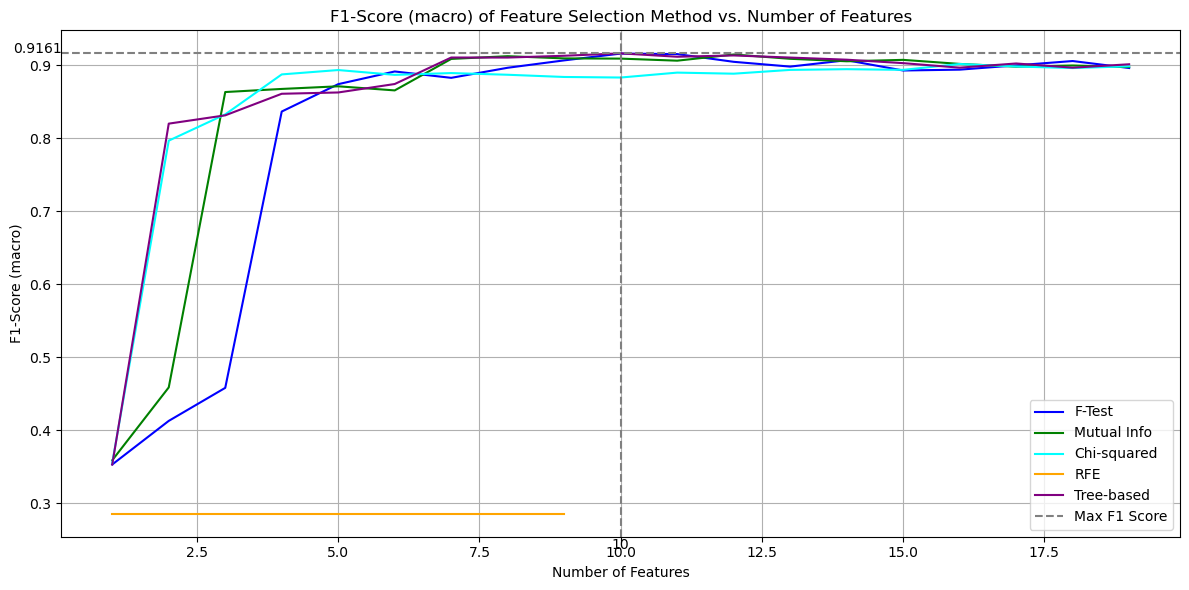

Max F-test F1 Score: 0.9157813917761007
Max Mutual Info F1 Score: 0.9144894812545309
Max Chi-squared F1 Score: 0.9015140276192027
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.9160806613663225


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


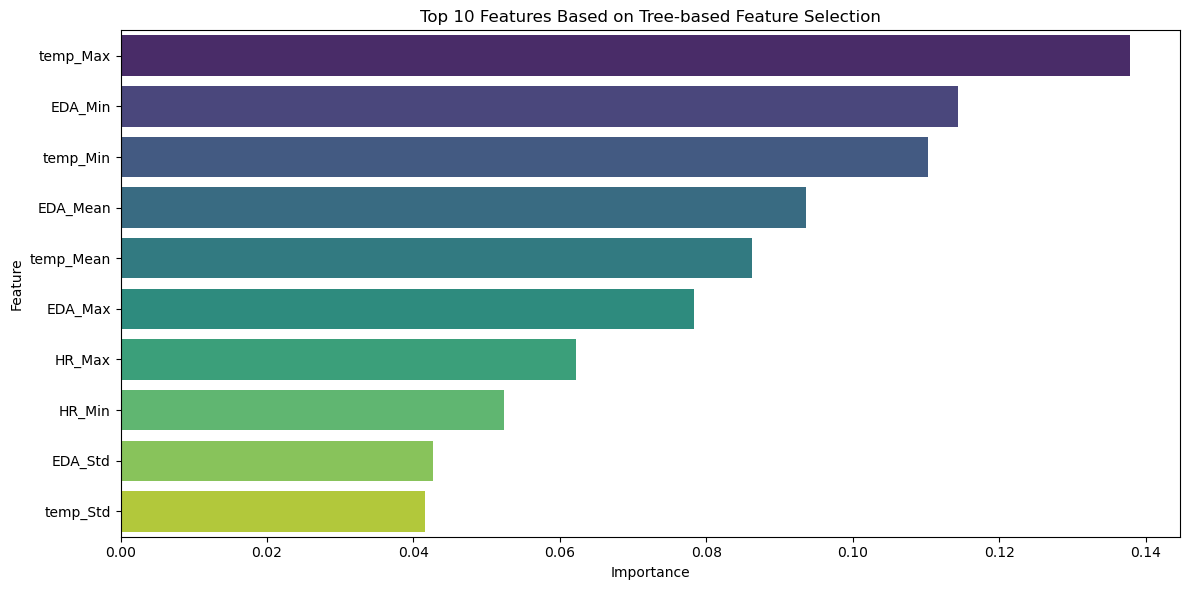

Feature: temp_Max, Importance: 0.13780255615711212
Feature: EDA_Min, Importance: 0.11442279070615768
Feature: temp_Min, Importance: 0.11023004353046417
Feature: EDA_Mean, Importance: 0.09356691688299179
Feature: temp_Mean, Importance: 0.08621382713317871
Feature: EDA_Max, Importance: 0.07831764966249466
Feature: HR_Max, Importance: 0.062238745391368866
Feature: HR_Min, Importance: 0.052353158593177795
Feature: EDA_Std, Importance: 0.04265466704964638
Feature: temp_Std, Importance: 0.041526373475790024


In [59]:
x = df_time[baseline_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]

result = analyze_feature_selection(x, y)

In [60]:
top_selected_features = result["selected_features"]

# train a model with the top selected features
x = df_time[top_selected_features['Feature']]
y = df_time["label"]
x.dropna()
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
print("Accuracy Top Selected Features:", accuracy_score(test_labels, predictions))


c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1322
           1       0.91      0.79      0.85       157
           2       0.97      0.99      0.98      4469

    accuracy                           0.96      5948
   macro avg       0.94      0.89      0.92      5948
weighted avg       0.96      0.96      0.96      5948

Accuracy Top Selected Features: 0.9618359112306658


c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain,

Maximum accuracy: 0.919475618564619 using Tree-based feature selection method with 13 features.


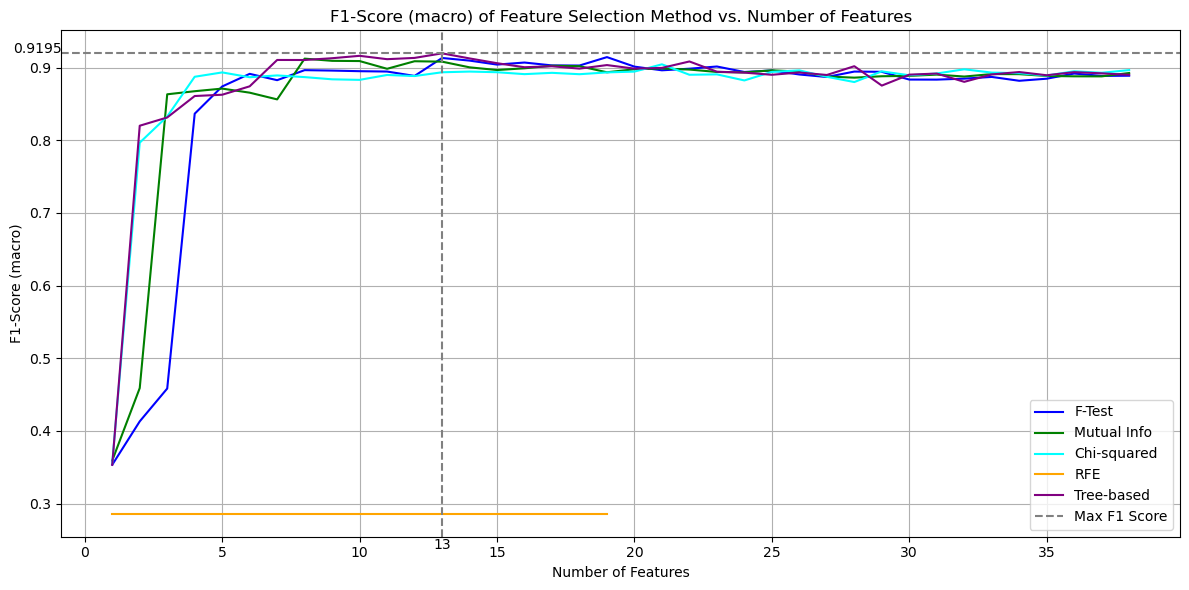

Max F-test F1 Score: 0.9142953805327921
Max Mutual Info F1 Score: 0.9122054389593265
Max Chi-squared F1 Score: 0.904371432743266
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.919475618564619


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


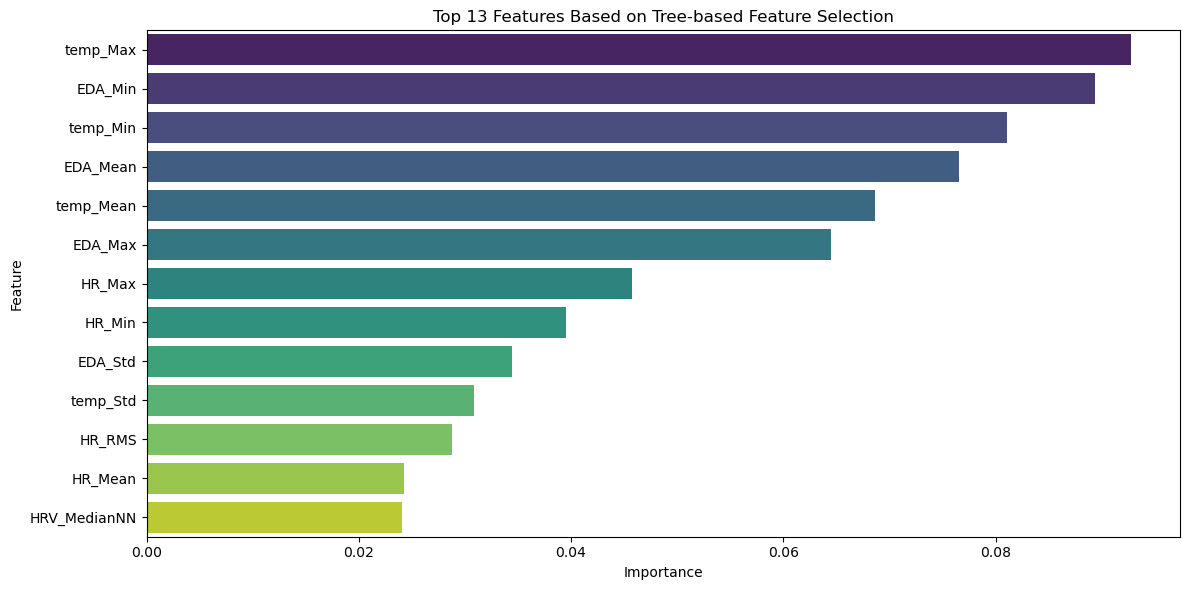

Feature: temp_Max, Importance: 0.09273997694253922
Feature: EDA_Min, Importance: 0.08939926326274872
Feature: temp_Min, Importance: 0.08111768215894699
Feature: EDA_Mean, Importance: 0.07658035308122635
Feature: temp_Mean, Importance: 0.0686396136879921
Feature: EDA_Max, Importance: 0.06444820761680603
Feature: HR_Max, Importance: 0.045734953135252
Feature: HR_Min, Importance: 0.03951483219861984
Feature: EDA_Std, Importance: 0.03447011485695839
Feature: temp_Std, Importance: 0.030882570892572403
Feature: HR_RMS, Importance: 0.028739644214510918
Feature: HR_Mean, Importance: 0.024304065853357315
Feature: HRV_MedianNN, Importance: 0.024114100262522697


In [61]:
x = df_time[time_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]

result = analyze_feature_selection(x, y)

In [62]:
top_selected_features = result["selected_features"]

# train a model with the top selected features
x = df_time[top_selected_features['Feature']]
y = df_time["label"]
x.dropna()
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
print("Accuracy Top Selected Features:", accuracy_score(test_labels, predictions))


c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1322
           1       0.92      0.80      0.86       157
           2       0.97      0.99      0.98      4469

    accuracy                           0.96      5948
   macro avg       0.95      0.90      0.92      5948
weighted avg       0.96      0.96      0.96      5948

Accuracy Top Selected Features: 0.9621721587088097


## RANDOM FOREST FEATURE SELECTION

Maximum accuracy: 0.9172234773135225 using Mutual Info feature selection method with 7 features.


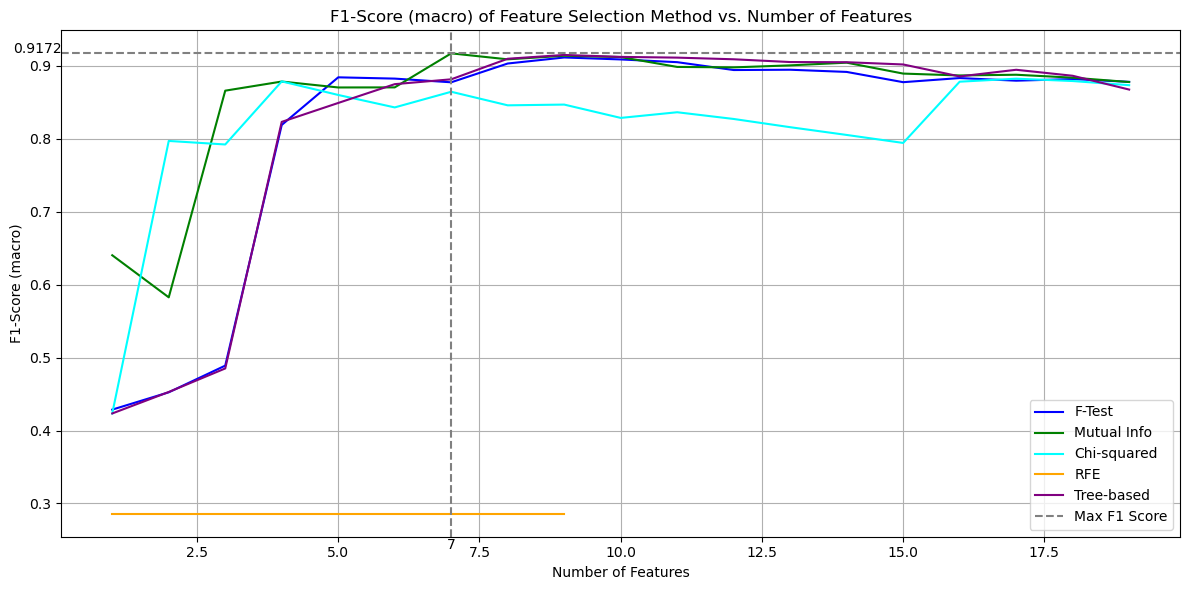

Max F-test F1 Score: 0.9115645934124074
Max Mutual Info F1 Score: 0.9172234773135225
Max Chi-squared F1 Score: 0.8824929184169776
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.9150254267006339


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


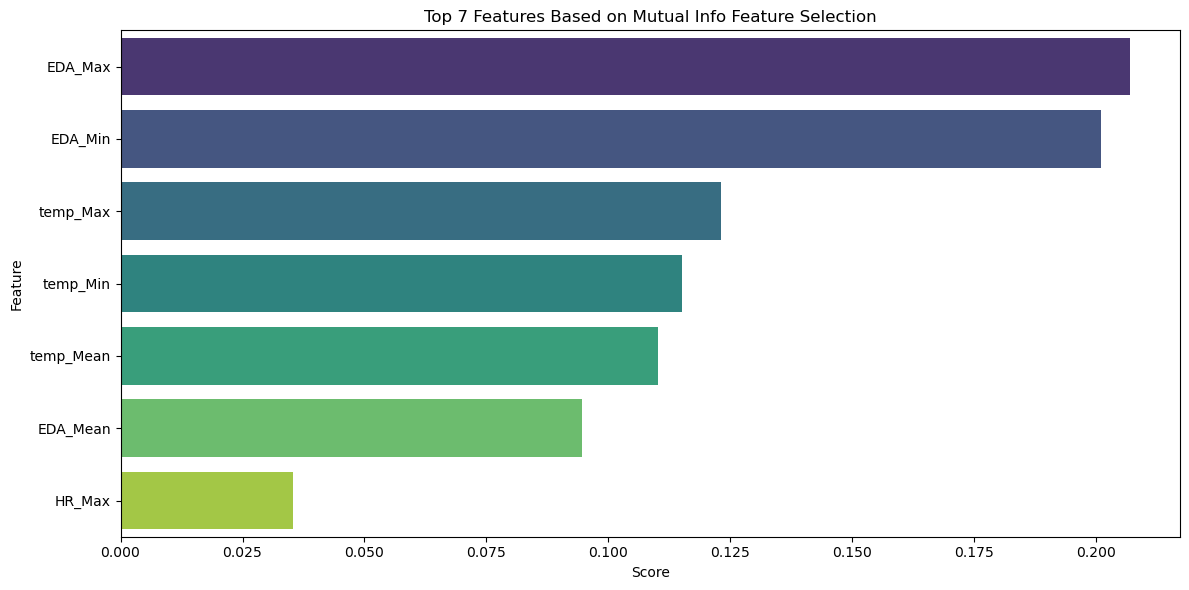

Feature: EDA_Max, Importance: 0.2068121048370144
Feature: EDA_Min, Importance: 0.20103871220402336
Feature: temp_Max, Importance: 0.12315416858386885
Feature: temp_Min, Importance: 0.11518036349462424
Feature: temp_Mean, Importance: 0.11025815713118514
Feature: EDA_Mean, Importance: 0.09466276908051796
Feature: HR_Max, Importance: 0.035324923208694736


In [50]:
x = df_time[baseline_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]

result = analyze_feature_selection(x, y)

In [52]:
top_selected_features = result["selected_features"]

# train a model with the top selected features
x = df_time[top_selected_features['Feature']]
y = df_time["label"]
x.dropna()
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
print("Accuracy Top Selected Features:", accuracy_score(test_labels, predictions))


c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:16:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1322
           1       0.89      0.78      0.83       157
           2       0.96      0.98      0.97      4469

    accuracy                           0.96      5948
   macro avg       0.93      0.89      0.91      5948
weighted avg       0.96      0.96      0.96      5948

Accuracy Top Selected Features: 0.9589778076664425


Maximum accuracy: 0.9157352700525982 using Mutual Info feature selection method with 10 features.


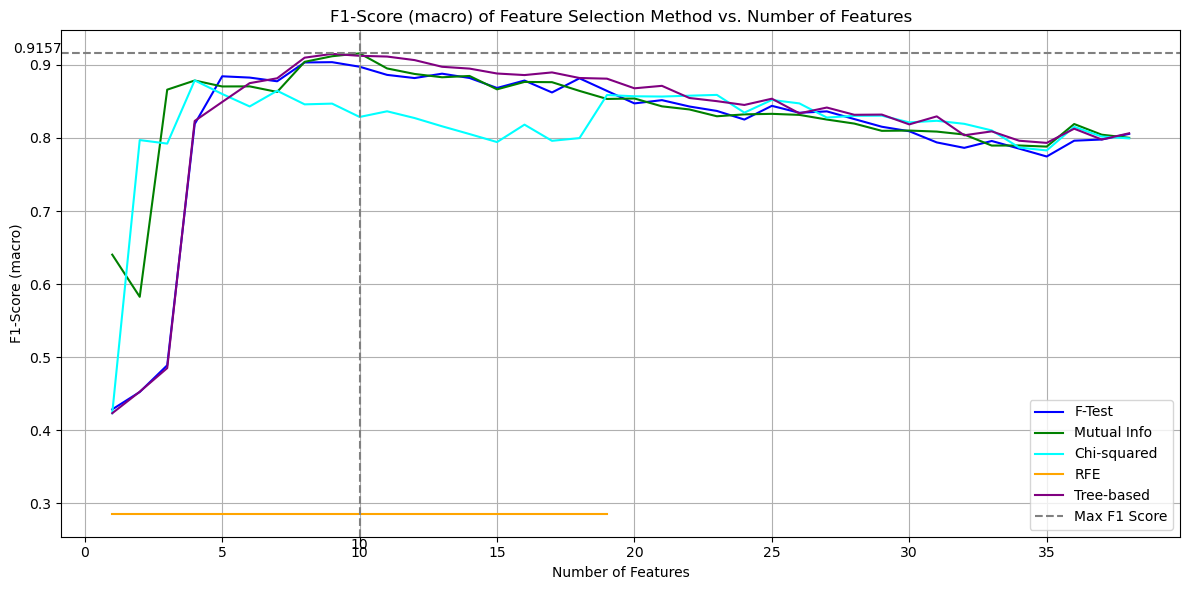

Max F-test F1 Score: 0.9036741502566047
Max Mutual Info F1 Score: 0.9157352700525982
Max Chi-squared F1 Score: 0.8787564278476802
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.9150254267006339


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


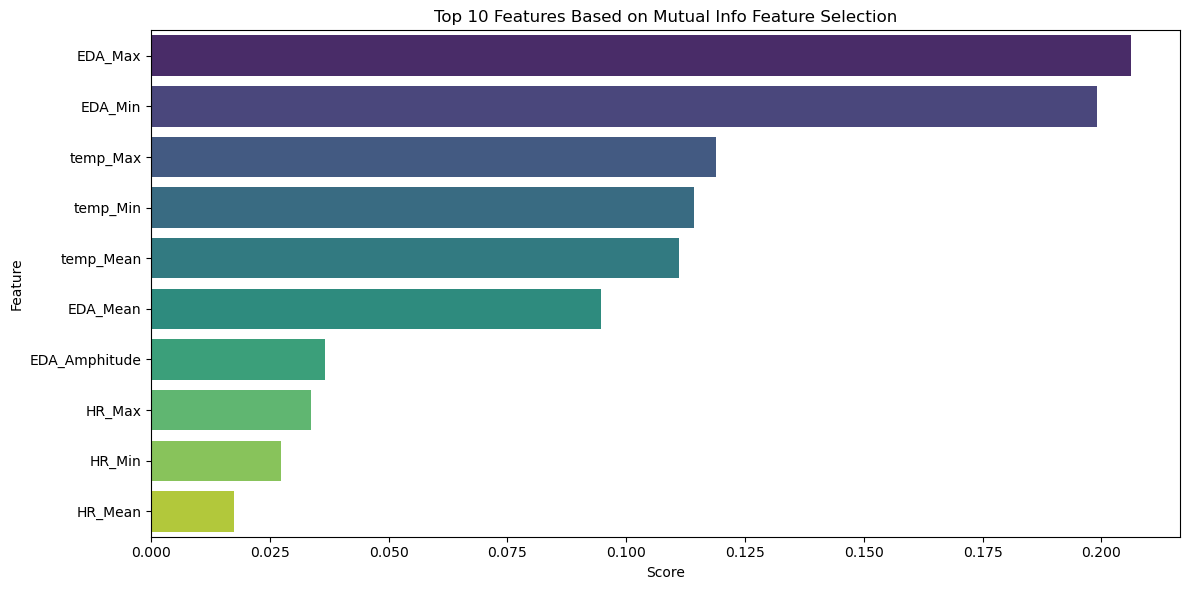

Feature: EDA_Max, Importance: 0.20624452590842135
Feature: EDA_Min, Importance: 0.19914997777147714
Feature: temp_Max, Importance: 0.11887100443897824
Feature: temp_Min, Importance: 0.11416733032653847
Feature: temp_Mean, Importance: 0.1110516153960055
Feature: EDA_Mean, Importance: 0.09467557005869853
Feature: EDA_Amphitude, Importance: 0.03656178058860471
Feature: HR_Max, Importance: 0.033587508444651304
Feature: HR_Min, Importance: 0.02723619175240266
Feature: HR_Mean, Importance: 0.01750584198156857


In [53]:
x = df_time[time_attributes]
y = df_time["label"]
x.dropna()
y = y[x.index]

result = analyze_feature_selection(x, y)

In [ ]:
top_selected_features = result["selected_features"]

# train a model with the top selected features
x = df_time[top_selected_features['Feature']]
y = df_time["label"]
x.dropna()
y = y[x.index]
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)
xgb_model.fit(train, train_labels)
predictions = xgb_model.predict(test)
print(classification_report(test_labels, predictions))
print("Accuracy Top Selected Features:", accuracy_score(test_labels, predictions))


c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:25:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1322
           1       0.91      0.76      0.83       157
           2       0.97      0.98      0.98      4469

    accuracy                           0.96      5948
   macro avg       0.94      0.88      0.91      5948
weighted avg       0.96      0.96      0.96      5948

Accuracy Top Selected Features: 0.960659045057162


# Model Berdasarkan Pengelompokan Fitur

## EDA (electrodermal activity)

c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:27:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:27:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain,

Maximum accuracy: 0.49609355229476565 using Mutual Info feature selection method with 6 features.


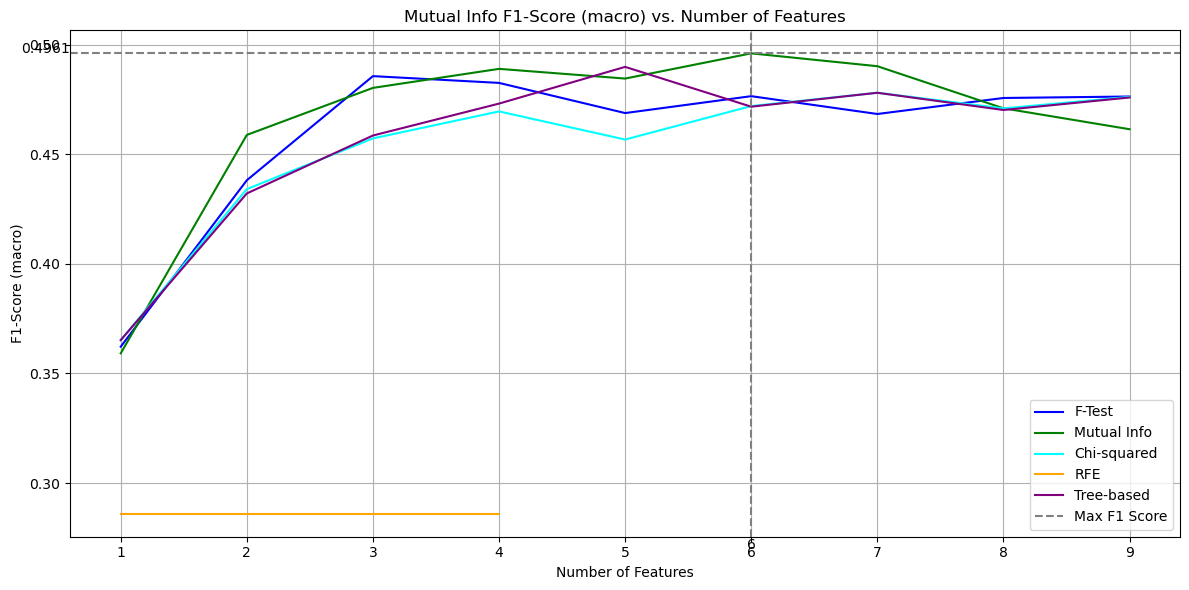

Max F-test F1 Score: 0.48569848669573695
Max Mutual Info F1 Score: 0.49609355229476565
Max Chi-squared F1 Score: 0.4781056375069608
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.48992094688109633


C:\Users\malik\AppData\Local\Temp\ipykernel_36612\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


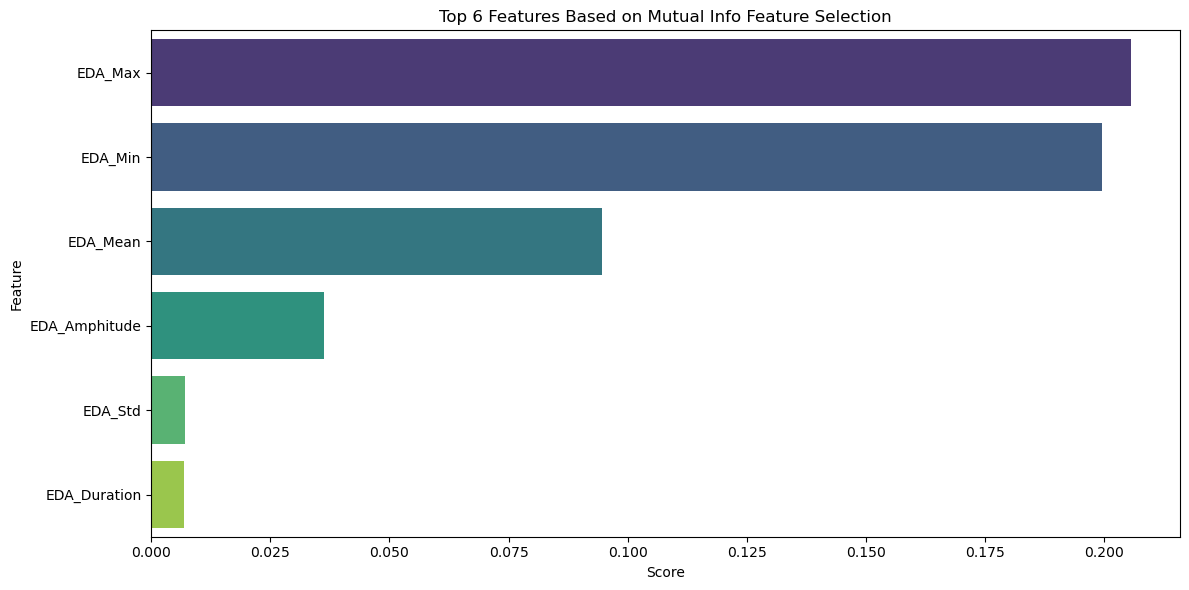

Feature: EDA_Max, Importance: 0.20560493310301653
Feature: EDA_Min, Importance: 0.19942476088047778
Feature: EDA_Mean, Importance: 0.09465729636366049
Feature: EDA_Amphitude, Importance: 0.03626787365023665
Feature: EDA_Std, Importance: 0.007016556556949771
Feature: EDA_Duration, Importance: 0.006938449542580383


In [134]:
x_eda = df_time[eda_attributes]
y_eda = df_time["label"]
x_eda.dropna()
y_eda = y_eda[x_eda.index]

result_eda = analyze_feature_selection(x_eda, y_eda)

## Temperature

Maximum accuracy: 0.5056255122384647 using F-test feature selection method with 5 features.


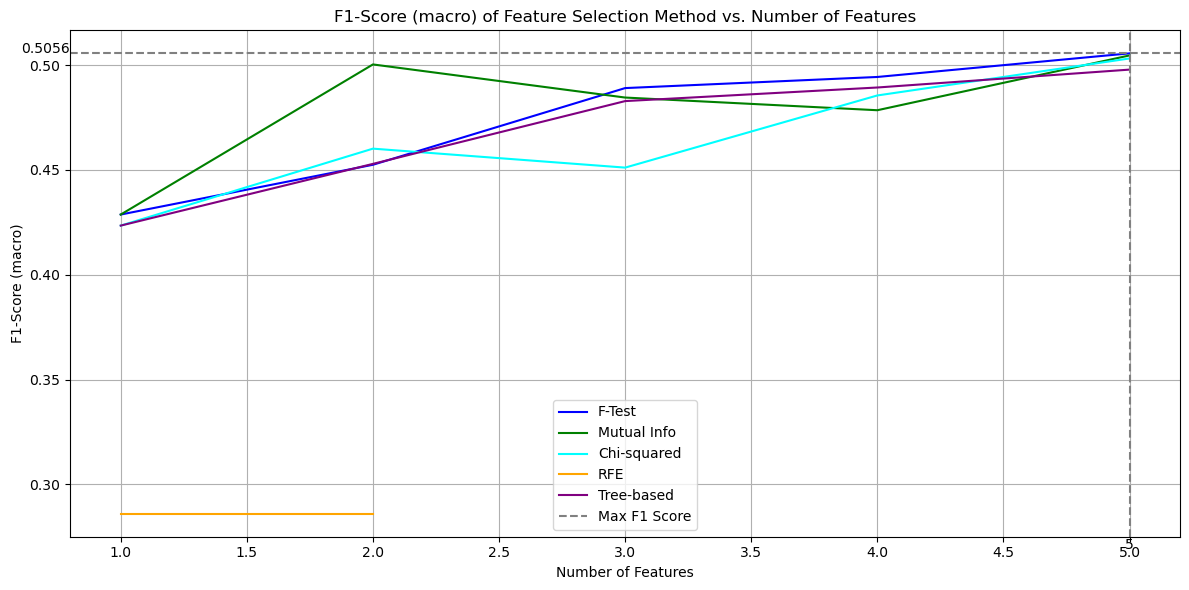

Max F-test F1 Score: 0.5056255122384647
Max Mutual Info F1 Score: 0.5046373138674332
Max Chi-squared F1 Score: 0.5031874863485241
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.4978697671079197


C:\Users\malik\AppData\Local\Temp\ipykernel_33776\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


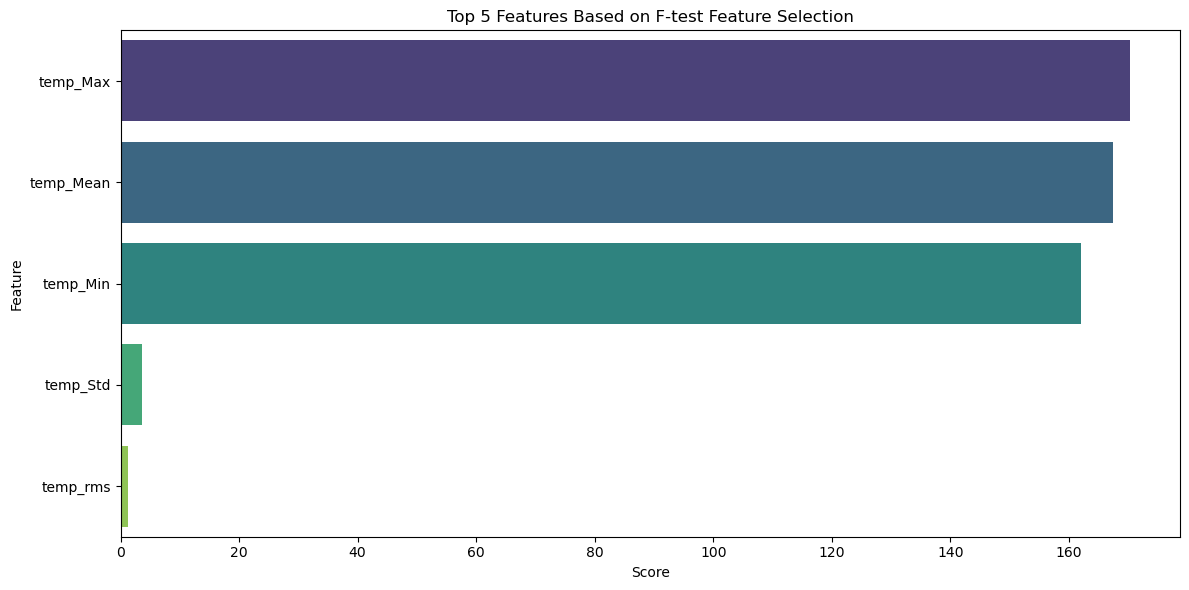

Feature: temp_Max, Importance: 170.20519966035064
Feature: temp_Mean, Importance: 167.4646921221721
Feature: temp_Min, Importance: 162.01821681311978
Feature: temp_Std, Importance: 3.65030268254703
Feature: temp_rms, Importance: 1.2895872468268532


In [55]:
x_temp = df_time[temp_attributes]
y_temp = df_time["label"]
x_temp.dropna()
y_temp = y_temp[x_temp.index]

result_temp = analyze_feature_selection(x_temp, y_temp)

## HR (Heart Rate)

c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\malik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:28:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain,

Maximum accuracy: 0.335258149289728 using Mutual Info feature selection method with 5 features.


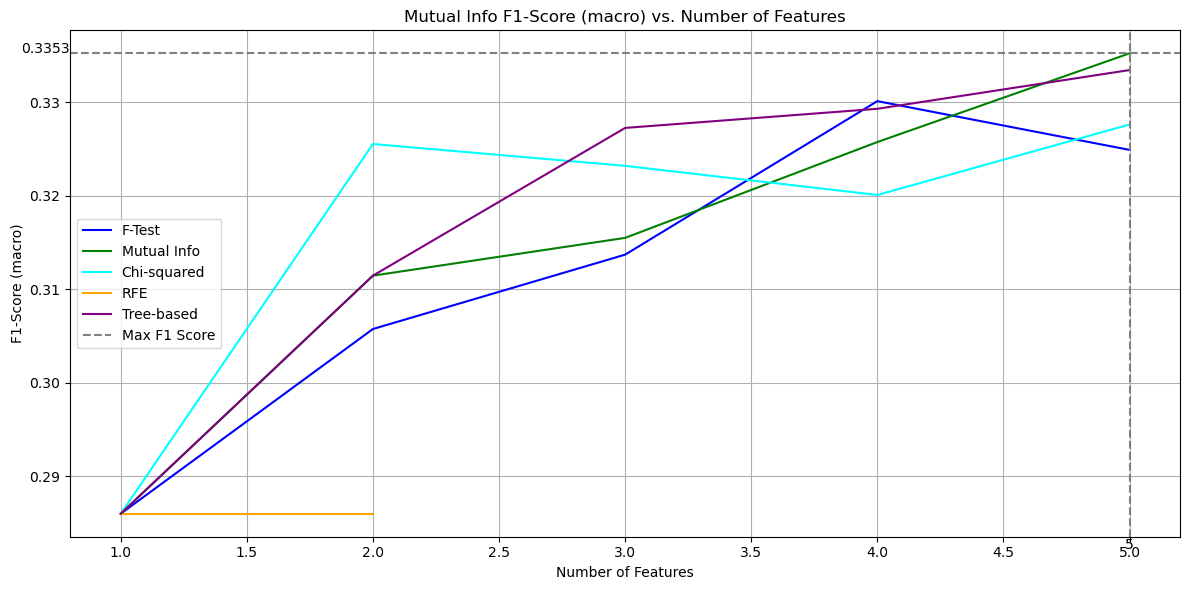

Max F-test F1 Score: 0.3301452173979504
Max Mutual Info F1 Score: 0.335258149289728
Max Chi-squared F1 Score: 0.327647336553716
Max RFE F1 Score: 0.286006847780871
Max Tree-based F1 Score: 0.3334703917853365


C:\Users\malik\AppData\Local\Temp\ipykernel_36612\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


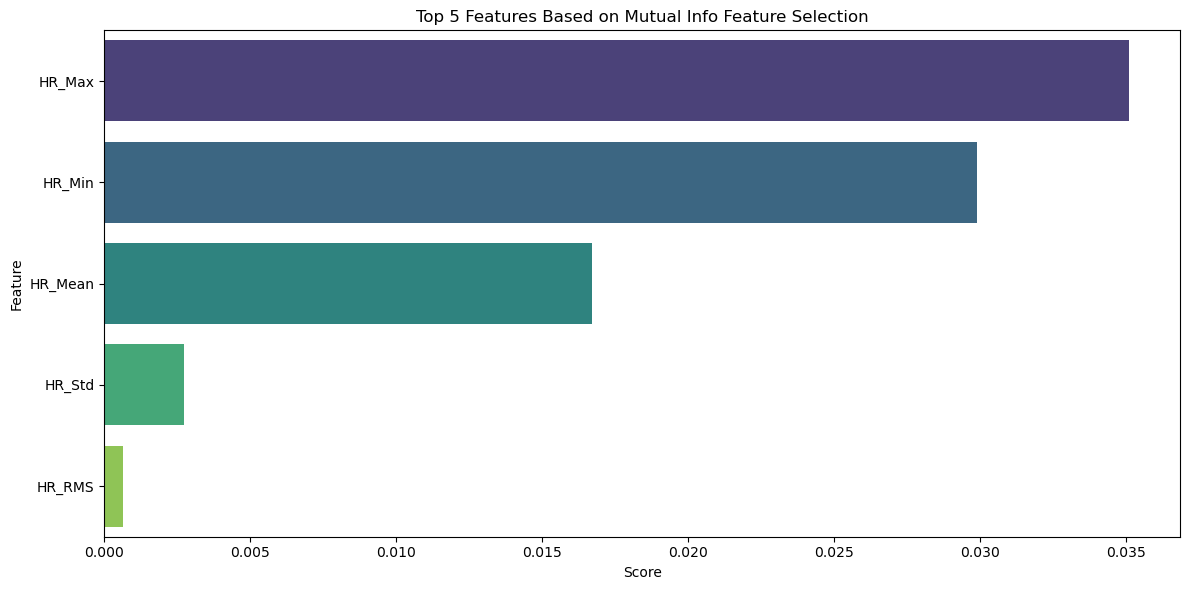

Feature: HR_Max, Importance: 0.035089955027113096
Feature: HR_Min, Importance: 0.029889124731043548
Feature: HR_Mean, Importance: 0.016719501160435524
Feature: HR_Std, Importance: 0.00274652048870494
Feature: HR_RMS, Importance: 0.0006449353846196271


In [136]:
x_hr = df_time[hr_attributes]
y_hr = df_time["label"]
x_hr.dropna()
y_hr = y_hr[x_hr.index]

result_hr = analyze_feature_selection(x_hr, y_hr)

## HRV (Heart Rate Variability)

c:\Users\malik\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.324e+00, tolerance: 3.089e-01
  model = cd_fast.enet_coordinate_descent(


Maximum accuracy: 0.5156647304566715 using Tree-based feature selection method with 8 features.


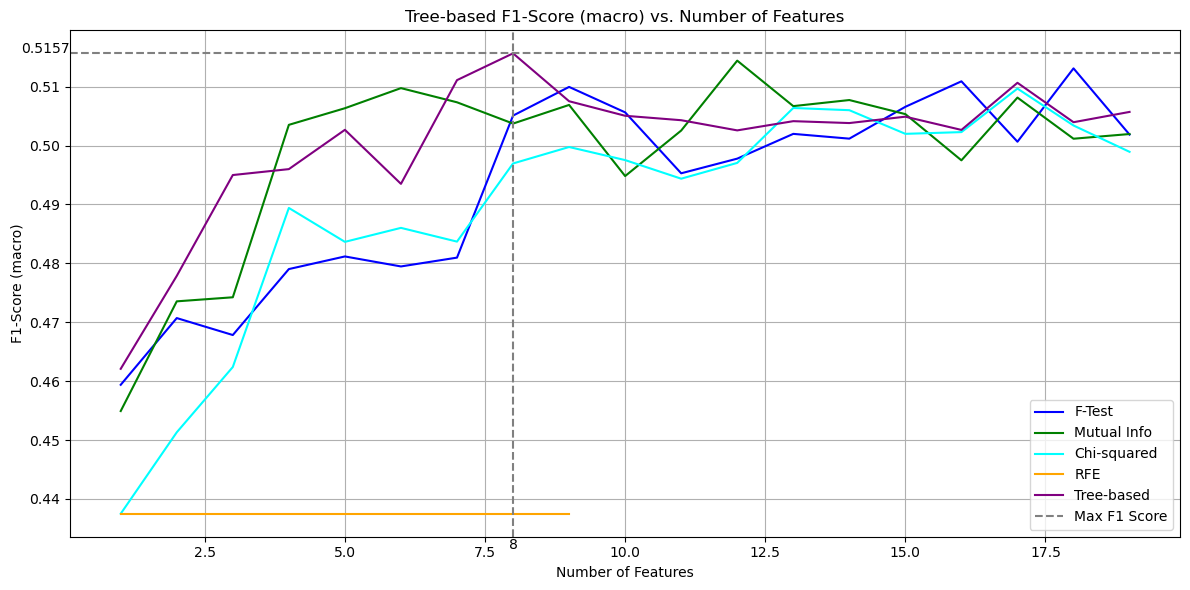

Max F-test F1 Score: 0.5131142853057664
Max Mutual Info F1 Score: 0.5144268039332897
Max Chi-squared F1 Score: 0.5096820735746267
Max RFE F1 Score: 0.43748817855116323
Max Tree-based F1 Score: 0.5156647304566715


C:\Users\malik\AppData\Local\Temp\ipykernel_36612\1970459252.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_1, y=col_0, data=max_features, palette='viridis')


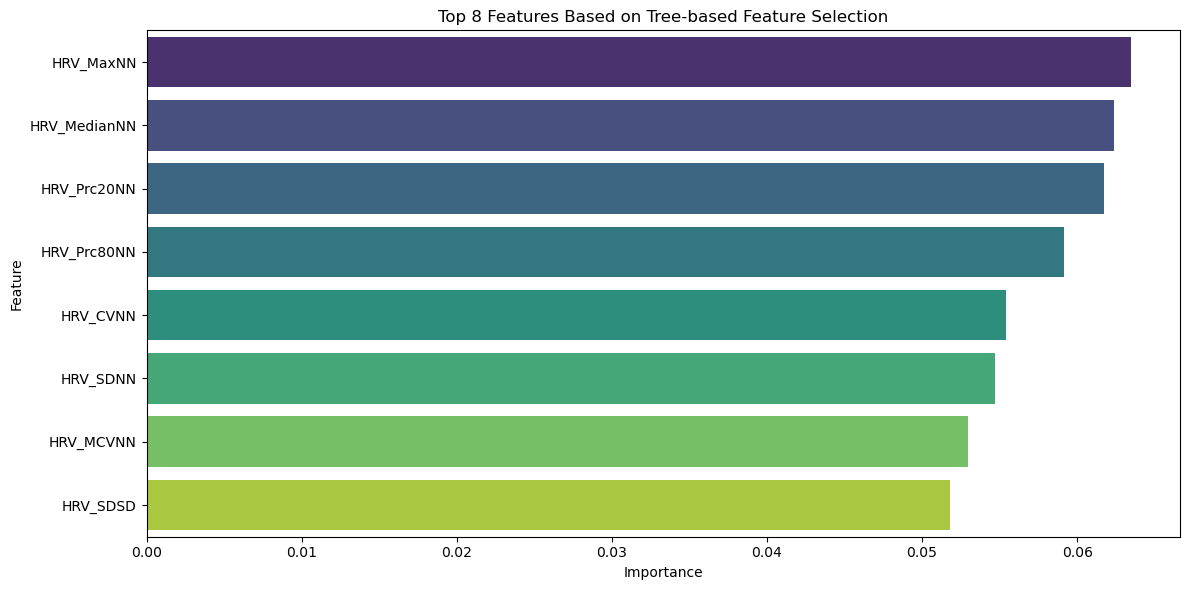

Feature: HRV_MaxNN, Importance: 0.06345918774604797
Feature: HRV_MedianNN, Importance: 0.06235490366816521
Feature: HRV_Prc20NN, Importance: 0.06176009774208069
Feature: HRV_Prc80NN, Importance: 0.05912543088197708
Feature: HRV_CVNN, Importance: 0.05540405586361885
Feature: HRV_SDNN, Importance: 0.054693520069122314
Feature: HRV_MCVNN, Importance: 0.05294645577669144
Feature: HRV_SDSD, Importance: 0.051826201379299164


In [137]:
x_hrv = df_time[hrv_attributes]
y_hrv = df_time["label_binary"]
x_hrv.dropna()
y_hrv = y_hrv[x_hrv.index]

result_hrv = analyze_feature_selection(x_hrv, y_hrv)

In [ ]:
from sklearn.model_selection import StratifiedKFold

# ftest, mutual, rfe, l1, treebased, boruta, corr 

selected_features = {
    'F-test': selected_features_ftest['Feature'].head(10).tolist(),
    'Mutual Info': selected_features_mutual['Feature'].head(10).tolist(),
    'RFE': selected_features_rfe[:10].tolist(),
    'L1 Regularization': selected_features_l1.head(10).tolist(),
    'Tree-based': selected_features_treebased['Feature'].head(10).tolist(),
    # 'Boruta': selected_features_boruta[:10].tolist(),
    # 'Correlation': selected_features_corr[:10].tolist()
}

# create xgb models for each feature selection method
def train_xgb_model(features):
    x_selected = x[features]
    x_selected.dropna()
    y_selected = y[x_selected.index]
    
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
    train, test, train_labels, test_labels = train_test_split(x_selected, y_selected, test_size=0.33, random_state=30)
    xgb_model.fit(train, train_labels)
    predictions = xgb_model.predict(test)
    acc = accuracy_score(test_labels, predictions)
    return acc

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30) 

# Function to train and evaluate the model using CV
def train_xgb_model_with_cv(features):
    x_selected = x[features]
    x_selected = x_selected.dropna()
    y_selected = y[x_selected.index]
    
    accuracies = []
    
    for train_idx, test_idx in cv.split(x_selected, y_selected):
        train_data, test_data = x_selected.iloc[train_idx], x_selected.iloc[test_idx]
        train_labels, test_labels = y_selected.iloc[train_idx], y_selected.iloc[test_idx]
        
        xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=30, eval_metric='logloss', scale_pos_weight=1)
        xgb_model.fit(train_data, train_labels)
        predictions = xgb_model.predict(test_data)
        # print(f"Classification Report for {features}:")
        # print(classification_report(test_labels, predictions))
        accuracies.append(accuracy_score(test_labels, predictions))
    
    return np.mean(accuracies)  # Return the average accuracy across folds

# Train models and get accuracies
accuracies = {}
for method, features in selected_features.items():
    acc = train_xgb_model(features)
    accuracies[method] = acc
    print(f"Average Accuracy for {method}: {acc:.5f}")

Average Accuracy for F-test: 0.92116
Average Accuracy for Mutual Info: 0.94374
Average Accuracy for RFE: 0.95101
Average Accuracy for L1 Regularization: 0.93418
Average Accuracy for Tree-based: 0.94489
Average Accuracy for Boruta: 0.77650


## SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', class_weight='balanced', random_state=30)
svm.fit(train, train_labels)
predictions = svm.predict(test)
print(classification_report(test_labels, predictions))
print("Accuracy SVM:", accuracy_score(test_labels, predictions))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Neural Network (MLP)

In [ ]:
# neural network

x = df_time_balanced[time_attributes]
y = df_time_balanced["label_binary"]

x.dropna(inplace=True)  # Ensure no NaN values in the features
y = y[x.index]  # Align labels with features after dropping NaNs

from sklearn.neural_network import MLPClassifier

train, test, train_labels, test_labels = train_test_split(x, y, test_size=0.33, random_state=30)

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=30)
nn.fit(train, train_labels)
predictions = nn.predict(test)
print(classification_report(test_labels, predictions))
print("Accuracy NN:", accuracy_score(test_labels, predictions))
# Confusion matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:
# sns.pairplot(df_time[[*time_attributes, "label_binary"]], hue="label_binary", palette="Set1")